In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint


np.random.seed(500)

In [3]:
df=pd.read_csv(r"C:\Users\ADITYA\Desktop\Softwares\ML sem 2\breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df['diagnosis'] = np.where(df['diagnosis'] == 'B', 0, 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
del df['id']

In [7]:
# First - split into Train/Test
from sklearn.model_selection import train_test_split

features = list(df.columns.values)
features.remove('diagnosis')
print(features)
x = df[features]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
(426, 30)
(143, 30)


In [8]:
# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [9]:
## Create our model
model = Sequential()

# 1st layer: input_dim=30, 32 nodes, RELU
model.add(Dense(65, input_dim=30,  activation='relu'))
# 2nd layer: 30 nodes, RELU
model.add(Dense(30, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1,  activation='sigmoid' ))

In [10]:
# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
# checkpoint: store the best model
ckpt_model = 'BreastCancer-weight.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [20]:
print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=140,
                    batch_size=15,
                    )

Starting training...
Epoch 1/140
29/29 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.9554 - val_loss: 0.1001 - val_accuracy: 0.9580
Epoch 2/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9507 - val_loss: 0.0830 - val_accuracy: 0.9720
Epoch 3/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9531 - val_loss: 0.2937 - val_accuracy: 0.9091
Epoch 4/140
29/29 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9155 - val_loss: 0.4095 - val_accuracy: 0.8881
Epoch 5/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9225 - val_loss: 0.1205 - val_accuracy: 0.9441
Epoch 6/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9624 - val_loss: 0.1113 - val_accuracy: 0.9650
Epoch 7/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9507 - val_loss: 0.1268 - val_accuracy:

Epoch 116/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9624 - val_loss: 0.0987 - val_accuracy: 0.9510
Epoch 117/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9624 - val_loss: 0.1373 - val_accuracy: 0.9650
Epoch 118/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9437 - val_loss: 0.3400 - val_accuracy: 0.8951
Epoch 119/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9531 - val_loss: 0.1025 - val_accuracy: 0.9580
Epoch 120/140
29/29 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9601 - val_loss: 0.1030 - val_accuracy: 0.9580
Epoch 121/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9671 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 122/140
29/29 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9531 - val_loss: 0.1755 - val_accuracy: 0.9510

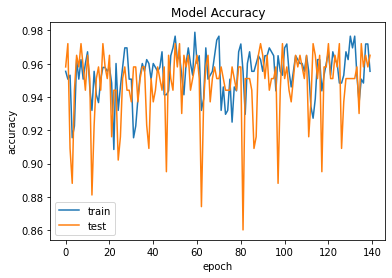

In [21]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

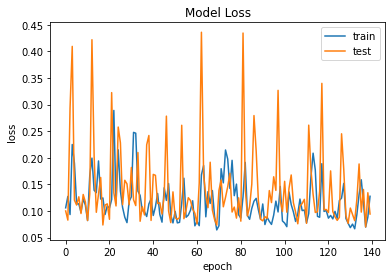

In [22]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [23]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.50%
